## Electric Vehicles

Electric vehicles are rapidly gaining in popularity. Electric vehicle registrations have jumped at least 23% over the past [four years](https://www.lendingtree.com/auto/electric-vehicle-popularity-study), and currently make up about 5.5% of the market. One of the major drawbacks (and concerns from consumers) of electric vehicles is their range. Electric vehicles take much longer to charge than filling up a gas-powered vehicle and charging stations are still relatively rare. 

In this project, we'll take a look at an electric vehicle dataset to investigate predicting the range of each vehicle.

## Data Set
We are using the [Electric Vehicles](https://www.kaggle.com/datasets/mohamedalishiha/electric-vehicles) data set from Kaggle. It contains information on 194 electric vehicles on the market until 2022. 

### Data Dictionary
- ```id```: unique identifier
- ```Make```: brand of the car
- ```link```: source url
- ```City - Cold Weather```: range in km under cold weather conditions (-10 deg) in cities
- ```Highway - Cold Weather```: range in km under cold weather conditions (-10 deg) on highways
- ```Combined - Cold Weather```: range in km under cold weather conditions (-10 deg) combined
- ```City - Mild Weather```: range in km under mild weather conditions (23 deg) in cities
- ```Highway - Mild Weather```: range in km under mild weather conditions (23 deg) on highways
- ```Combined - Mild Weather```: range in km under mild weather conditions (23 deg) combined
- ```Acceleration 0-100 km/h```: acceleration from 0 to 100 km/hr in seconds
- ```Top Speed```: top speed in km/hr
- ```Electric Range```: advertised electric range in km
- ```Total Power```
- ```Total Torque```
- ```Drive```: Rear, Front, AWD
- ```Battery Capacity```: total capacity of the battery in KW
- ```Charge Power```
- ```Charge Speed```
- ```Fastcharge Speed```
- ```Length```: car length in mm
- ```Width```: car width in mm
- ```Height```: car height in mm
- ```Wheelbase```: wheelbase in mm
- ```Gross Vehicle Weight```: gross weight of the car in kg
- ```Max Payload```
- ```Cargo Volume```: Cargo volume of the car in litters
- ```Seats```: number of seats

## Goal
Predict the ```Electric Range``` of the vehicle based on other vehicle properties.

In [90]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor


import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-white')
plt.rc('figure', autolayout=True)
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=14,
    linewidth=4
    )


%matplotlib inline


## Data Exploration

We will begin by loading the data and exploring it to get a better sense of the data set. 

In [2]:
ev = pd.read_csv('evdataset.csv')

In [3]:
ev.head()

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,...,55,570,4261,1809,1568,2771,2300,447,385,5


In [4]:
ev.describe()

,id,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,1526.257732,343.247423,247.500000,293.144330,502.706186,315.721649,393.608247,7.870619,177.015464,345.592784,...,44.396907,528.711340,4702.087629,1880.061856,1620.706186,2899.829897,2633.139175,619.257732,507.190722,5.536082
std,154.958947,92.173078,75.553656,84.558652,138.297461,98.967440,117.054175,3.168385,38.110213,101.384377,...,15.617918,256.219808,378.219208,68.719346,152.249425,238.567154,415.592250,199.938995,192.411664,1.530768
min,1116.000000,135.000000,95.000000,115.000000,210.000000,125.000000,160.000000,2.800000,125.000000,135.000000,...,24.000000,150.000000,3631.000000,1622.000000,1378.000000,2322.000000,1300.000000,245.000000,171.000000,4.000000
25%,1437.250000,280.000000,185.000000,230.000000,395.000000,230.000000,295.000000,5.400000,150.000000,265.000000,...,34.000000,312.500000,4469.750000,1837.000000,1519.750000,2764.000000,2310.000000,497.000000,405.000000,5.000000
50%,1557.500000,350.000000,250.000000,300.000000,515.000000,320.000000,400.000000,7.400000,160.000000,352.500000,...,46.000000,470.000000,4694.000000,1887.000000,1614.000000,2900.000000,2660.000000,572.500000,472.500000,5.000000
75%,1648.750000,403.750000,295.000000,345.000000,595.000000,375.000000,470.000000,9.650000,200.000000,410.000000,...,51.750000,650.000000,4959.000000,1920.750000,1652.000000,3082.500000,2968.750000,645.000000,558.250000,5.000000
max,1757.000000,595.000000,470.000000,535.000000,895.000000,615.000000,740.000000,19.100000,261.000000,640.000000,...,110.000000,1170.000000,5391.000000,2011.000000,1927.000000,3430.000000,3500.000000,1121.000000,1410.000000,9.000000


In [5]:
ev.shape

(194, 27)

In [65]:
ev.dtypes

id                               int64
Make                            object
link                            object
City - Cold Weather              int64
Highway - Cold Weather           int64
Combined - Cold Weather          int64
City - Mild Weather              int64
Highway - Mild Weather           int64
Combined - Mild Weather          int64
Acceleration 0 - 100 km/h      float64
Top Speed                        int64
Electric Range                   int64
Total Power                      int64
Total Torque                     int64
Drive                           object
Battery Capacity               float64
Charge Power                   float64
Charge Speed                     int64
Fastcharge Speed                 int64
Length                           int64
Width                            int64
Height                           int64
Wheelbase                        int64
Gross Vehicle Weight (GVWR)      int64
Max. Payload                     int64
Cargo Volume             

In [7]:
ev.isnull().sum()

id                             0
Make                           0
link                           0
City - Cold Weather            0
Highway - Cold Weather         0
Combined - Cold Weather        0
City - Mild Weather            0
Highway - Mild Weather         0
Combined - Mild Weather        0
Acceleration 0 - 100 km/h      0
Top Speed                      0
Electric Range                 0
Total Power                    0
Total Torque                   0
Drive                          0
Battery Capacity               0
Charge Power                   0
Charge Speed                   0
Fastcharge Speed               0
Length                         0
Width                          0
Height                         0
Wheelbase                      0
Gross Vehicle Weight (GVWR)    0
Max. Payload                   0
Cargo Volume                   0
Seats                          0
dtype: int64

In [8]:
ev['Drive'].value_counts()

AWD      75
Front    73
Rear     46
Name: Drive, dtype: int64

In [9]:
ev['Make'].value_counts()

Mercedes      24
Porsche       18
Audi          16
Volkswagen    13
Peugeot       12
Citroen       11
Fiat           8
Toyota         8
MG             8
BMW            8
Ford           7
Kia            6
Opel           6
Skoda          5
Renault        5
Hyundai        5
Tesla          4
CUPRA          4
Volvo          4
Genesis        4
Smart          2
Polestar       2
Honda          2
Hongqi         2
Mazda          1
Jaguar         1
Nissan         1
Seres          1
Dacia          1
Lexus          1
JAC            1
Subaru         1
DS             1
Mini           1
Name: Make, dtype: int64

In [10]:
ev.nunique()

id                             194
Make                            34
link                           194
City - Cold Weather             64
Highway - Cold Weather          52
Combined - Cold Weather         57
City - Mild Weather             82
Highway - Mild Weather          59
Combined - Mild Weather         67
Acceleration 0 - 100 km/h       72
Top Speed                       29
Electric Range                  66
Total Power                     65
Total Torque                    69
Drive                            3
Battery Capacity                49
Charge Power                     5
Charge Speed                    37
Fastcharge Speed                69
Length                          74
Width                           51
Height                          76
Wheelbase                       54
Gross Vehicle Weight (GVWR)    122
Max. Payload                   110
Cargo Volume                    74
Seats                            5
dtype: int64

There are 24 columns and 194 rows as expected. There are 6 columns related to the range of the vehicle in different situations that contain similar, and possibly redundant information. These contain major data leakage, so we will drop these columns for our analysis. 

Most of the columns have a variety of values. ```Charge Power``` and ```Seats``` both only have 5 unique values. 

This data is very clean. This is great because we only have 194 rows of data. With such a small data set, we do not want to get rid of any data. 

We have zero missing values. Nearly all of the values are already numerical. The ```Drive``` columns is a categorical variable that contains only 3 values (AWD, Front, and Rear). The ```Make``` column is a categorical variable that has 34 unique values. The ```link``` column is a web link that does not provide useful information. 

### Visualizing the Data

Now, let's create a few simple visualizations to further understand our data.

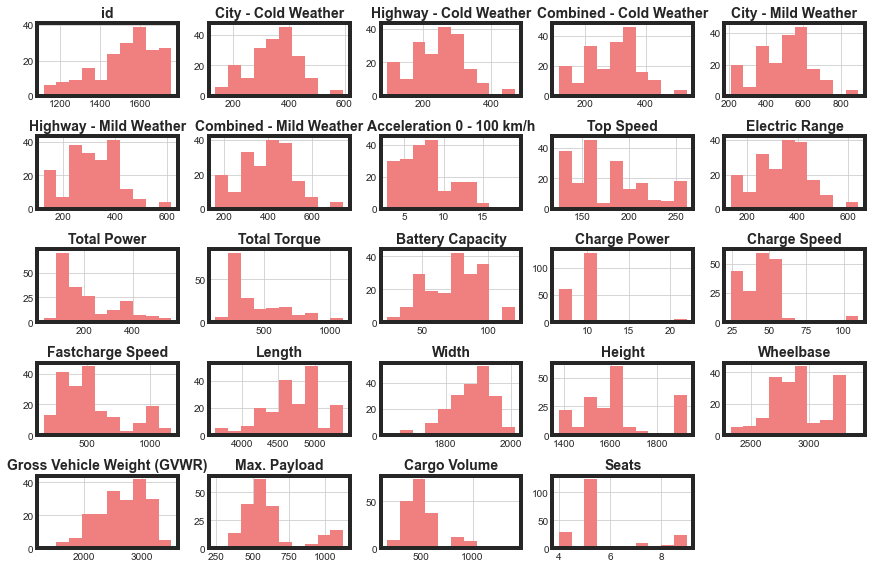

In [67]:
histograms = ev.hist(figsize=(12,8),color='lightcoral')

<AxesSubplot:>

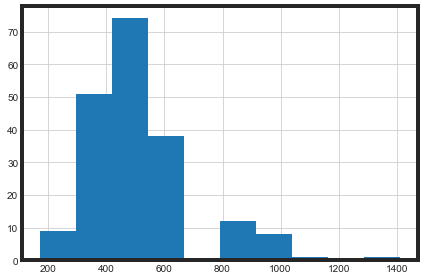

In [79]:
#ev['Max. Payload'].hist()
ev['Cargo Volume'].hist()
#ev['Top Speed'].hist()

In [12]:
ev['Charge Power'].describe()

count    194.000000
mean      10.151546
std        2.754238
min        6.600000
25%        7.400000
50%       11.000000
75%       11.000000
max       22.000000
Name: Charge Power, dtype: float64

In [13]:
ev['Charge Power'].value_counts()

11.0    127
7.4      42
6.6      12
7.2       7
22.0      6
Name: Charge Power, dtype: int64

In [42]:
ev['Seats'].value_counts()

5    124
4     30
9     24
7     10
8      6
Name: Seats, dtype: int64

```Max. Payload``` and ```Cargo Volume``` are clearly bimodal distributions. We'll convert these to ```Low``` and ```High``` categories to reduce some of the complexity of our data set for our model. ```Top Speed``` could be dealt with similarly, but that option is less clear for that feature.

<AxesSubplot:>

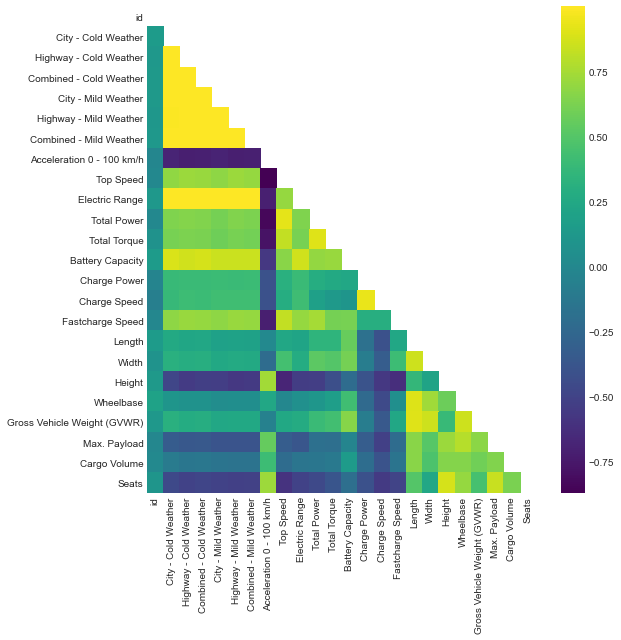

In [14]:
# plot a correlation matrix

corr = ev.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr,dtype=bool))

# set up the figure
plt.figure(figsize=(9,9))
sns.heatmap(corr,mask=mask,cmap='viridis')

In [15]:
ev.corrwith(ev['Electric Range']).sort_values()

Acceleration 0 - 100 km/h     -0.708172
Height                        -0.540106
Seats                         -0.500843
Max. Payload                  -0.373626
Cargo Volume                  -0.145220
Wheelbase                      0.061227
id                             0.128289
Length                         0.219826
Gross Vehicle Weight (GVWR)    0.269258
Width                          0.277975
Charge Power                   0.398395
Charge Speed                   0.415019
Total Torque                   0.614073
Total Power                    0.637401
Fastcharge Speed               0.701595
Top Speed                      0.706707
Battery Capacity               0.863062
City - Cold Weather            0.995611
City - Mild Weather            0.998262
Highway - Mild Weather         0.998401
Highway - Cold Weather         0.999215
Combined - Cold Weather        0.999298
Combined - Mild Weather        0.999340
Electric Range                 1.000000
dtype: float64

## Data WorkFlow

Now, we are going to write a few functions that we will use repeatedly to generate and test our models. These will allow us to quickly test and iterate. 

- remove unnecessary columns
- convert categorical columns
- test features
- test models
- hyperparmater testing

In [16]:
def remove_columns(df,cols):
    '''Removes columns from dataframe and returns new dataframe
    
    INPUT
        df: dataframe
        cols: list, columns to remove
        
    OUTPUT
        reduced_df: dataframe with specified columns removed
    '''
    reduced_df = df.drop(cols,axis=1)
    return reduced_df

In [26]:
def process_categorical(df,column_name):
    '''Performs One Hot Encoding on categorical columns
    
    INPUT
        df: dataframe
        column_name: categorical column to convert to numerical
        
    OUTPUT
        processed_df: dataframe with specified columns removed
    '''
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    processed_df = pd.concat([df,dummies],axis=1)
    return processed_df

In [18]:
def processing_function(df,col_to_drop,cat_col):
    '''Performs processing on the dataframe to prepare for modelling
    
    INPUT
        df: dataframe
        col_to_drop: list of columns to drop
        cat_col: list of columns to convert from categorical to numerical
        
    OUTPUT
        df: processed dataframe
    '''
    
    for x in col_to_drop:
        df = remove_columns(df, x)
        
    for x in cat_col:
        df = process_categorical(df, x)
        
    return df
    

In [21]:
def engineer_density(df):
    '''Engineers a new feature for modelling, the density of the vehicle. 
    INPUT
        df: dataframe
        
    OUTPUT
        df: dataframe with new feature
    '''
    df['volume'] = df['Height'] * df['Length'] * df['Width']
    df['density'] = df['Gross Vehicle Weight (GVWR)'] / df['volume'] 
    
    return df

In [81]:
def make_categorical(df,col,new_col,cut_points,label_names):
    ''' Takes a numerical category and converts it to categorical 
    INPUT
        df: dataframe
        col: string, name of existing column to convert
        new_col: string, name of new categorical column
        cut_points: list, values for bins 
        labels: list, names of labels, should be len(cut_points) - 1
        
    OUTPUT
        df: dataframe with new feature
    '''
    df[new_col] = pd.cut(df[col],cut_points,labels=label_names)
    return df

### Preparing Data for Modeling

In [20]:
ev.columns

Index(['id', 'Make', 'link', 'City - Cold Weather', 'Highway - Cold Weather',
       'Combined - Cold Weather', 'City - Mild Weather',
       'Highway - Mild Weather', 'Combined - Mild Weather',
       'Acceleration 0 - 100 km/h', 'Top Speed', 'Electric Range',
       'Total Power', 'Total Torque', 'Drive', 'Battery Capacity',
       'Charge Power', 'Charge Speed', 'Fastcharge Speed', 'Length', 'Width',
       'Height', 'Wheelbase', 'Gross Vehicle Weight (GVWR)', 'Max. Payload',
       'Cargo Volume', 'Seats'],
      dtype='object')

In [82]:
payload_col_name = 'Max. Payload'
payload_new_col_name = 'payload_cat'
payload_cut_points = [-1,800,1500]
payload_labels = ['Low','High']



cargo_col_name = 'Cargo Volume'
cargo_new_col_name = 'cargo_cat'
cargo_cut_points = [-1,700,1600]
cargo_labels = ['Low','High']

test_df = make_categorical(ev,payload_col_name,payload_new_col_name,payload_cut_points,payload_labels)
test_df = make_categorical(ev,cargo_col_name,cargo_new_col_name,cargo_cut_points,cargo_labels)
test_df.head()


,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats,payload_cat,cargo_cat
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,4515,1890,1580,2900,2495,595,432,5,Low,Low
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,4684,1834,1701,2829,2580,480,495,7,Low,Low
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,4963,1966,1381,2900,2880,575,366,4,Low,Low
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,...,4783,1852,1448,2856,2605,555,470,5,Low,Low
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,...,4261,1809,1568,2771,2300,447,385,5,Low,Low


In [86]:
# convert numerical columns to categorical
payload_col_name = 'Max. Payload'
payload_new_col_name = 'payload_cat'
payload_cut_points = [-1,800,1500]
payload_labels = ['Low','High']

cargo_col_name = 'Cargo Volume'
cargo_new_col_name = 'cargo_cat'
cargo_cut_points = [-1,700,1600]
cargo_labels = ['Low','High']

proc_ev = make_categorical(ev,payload_col_name,payload_new_col_name,payload_cut_points,payload_labels)
proc_ev = make_categorical(proc_ev,cargo_col_name,cargo_new_col_name,cargo_cut_points,cargo_labels)


# drop unnecessary, redundant, and leaking columns
columns_to_drop = ['id','Make','link','City - Cold Weather','Highway - Cold Weather',
                  'Combined - Cold Weather','City - Mild Weather','Highway - Mild Weather',
                  'Combined - Mild Weather']

categorical_columns = ['Drive','cargo_cat','payload_cat']

proc_ev = processing_function(proc_ev,columns_to_drop,categorical_columns)
proc_ev = engineer_density(proc_ev)

# now we need to remove the redundant columns
redundant_columns = ['Drive','Height','Length','Width',
                    'Gross Vehicle Weight (GVWR)', 'Drive_AWD', 'volume',
                    'Max. Payload','Cargo Volume','payload_cat',
                    'cargo_cat','cargo_cat_Low','payload_cat_Low']

proc_ev = remove_columns(proc_ev,redundant_columns)

In [87]:
proc_ev.head()

,Acceleration 0 - 100 km/h,Top Speed,Electric Range,Total Power,Total Torque,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed,Wheelbase,Seats,Drive_Front,Drive_Rear,cargo_cat_High,payload_cat_High,density
0,7.8,185,390,168,350,77.4,11.0,49,1020,2900,5,0,1,0,0,1.850521e-07
1,6.2,160,330,215,520,69.7,11.0,46,470,2829,7,0,0,0,0,1.765628e-07
2,3.2,260,415,500,850,93.4,11.0,46,1020,2900,4,0,0,0,0,2.137327e-07
3,5.7,190,470,250,430,83.9,11.0,54,730,2856,5,0,1,0,0,2.030943e-07
4,7.9,160,450,150,310,82.0,11.0,55,570,2771,5,0,1,0,0,1.902969e-07


## Selecting the Best Features
Now, we are ready to select the best features from the 15 features we now have available to us. 

In [88]:
def select_features(df):
    
    all_X = df.drop(['Electric Range'],axis=1)
    all_y = df['Electric Range']
    
    rf = RandomForestRegressor()
    selector = RFECV(rf,cv=10)
    selector.fit(all_X,all_y)
    best_columns = list(all_X.columns[selector.support_])
    print("Best Columns \n"+"-"*12+"\n{}\n".format(best_columns))

    return best_columns

In [89]:
cols = select_features(proc_ev)

Best Columns 
------------
['Top Speed', 'Total Power', 'Battery Capacity', 'Charge Speed', 'Fastcharge Speed']



## Selecting and Tuning an Algorithm

In [93]:
def select_model(df,features):
    all_X = df[features]
    all_y = df['Electric Range']
    
    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(max_iter=400),
            "hyperparameters":
                {
                    "solver": ["newton-cg", "lbfgs", "liblinear"]
                }
        },
        {
            "name": "KNeighborsRegressor",
            "estimator": KNeighborsRegressor(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,20,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["ball_tree", "kd_tree", "brute"],
                    "p": [1,2]
                }
        },
        {
            "name": "RandomForestRegressor",
            "estimator": RandomForestRegressor(),
            "hyperparameters":
                {
                    "n_estimators": [50, 100, 150],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]

                }
        },
        {
            "name": "XGBRegressor",
            "estimator": XGBRegressor(),
            "hyperparameters":
                {
                    "eta": [0.01, 0.05, 0.1, 0.2],
                    "max_depth": [4, 6, 8, 10]
                }
        }
    ]
    
    for model in models:
        print(model)
        grid = GridSearchCV(model['estimator'],
                            param_grid = model['hyperparameters'], 
                            cv=10,
                            scoring = 'neg_mean_absolute_error')
        grid.fit(all_X, all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))

    return models

In [94]:
result = select_model(proc_ev,cols)

{'name': 'LogisticRegression', 'estimator': LogisticRegression(max_iter=400), 'hyperparameters': {'solver': ['newton-cg', 'lbfgs', 'liblinear']}}


/Users/josh.fuchs/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/Users/josh.fuchs/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/Users/josh.fuchs/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/Users/josh.fuchs/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/Users/josh.fuchs/opt/anacond

Best Score: -32.30263157894737
Best Parameters: {'solver': 'newton-cg'}

{'name': 'KNeighborsRegressor', 'estimator': KNeighborsRegressor(), 'hyperparameters': {'n_neighbors': range(1, 20, 2), 'weights': ['distance', 'uniform'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}}
Best Score: -16.39473684210526
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'distance'}

{'name': 'RandomForestRegressor', 'estimator': RandomForestRegressor(), 'hyperparameters': {'n_estimators': [50, 100, 150], 'max_depth': [2, 5, 10], 'max_features': ['log2', 'sqrt'], 'min_samples_leaf': [1, 5, 8], 'min_samples_split': [2, 3, 5]}}
Best Score: -13.469292467625525
Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

{'name': 'XGBRegressor', 'estimator': XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,


Unsurprisingly, ```XGBRegressor``` performed the best of the 4 models we considered. And we currently have not explored the full parameter space for that model. It was about 1% better than the ```RandomForestRegressor```.